In [114]:
#Code taken from:

#https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib
#https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75
#https://www.datacamp.com/community/tutorials/decision-tree-classification-python
#https://scikit-learn.org/0.15/auto_examples/tree/plot_iris.html

import numpy as np
import pandas as pd
import os
import requests

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [115]:
def load_dataset(path, url):
    if not os.path.exists(path):
        os.mkdir(path)

    data = requests.get(url).content
    filename = os.path.join(path, os.path.basename(url))
    with open(filename, "wb") as file:
        file.write(data)

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
load_dataset('data', url)

col_names=['sepal length', 'sepal width', 'petal_length', 'petal_width', 'class']

data = pd.read_csv("data/iris.data", header=None, names=col_names)


In [116]:
feature_cols=['sepal length', 'sepal width', 'petal_length', 'petal_width']
X=data[feature_cols] # features
y = data['class'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


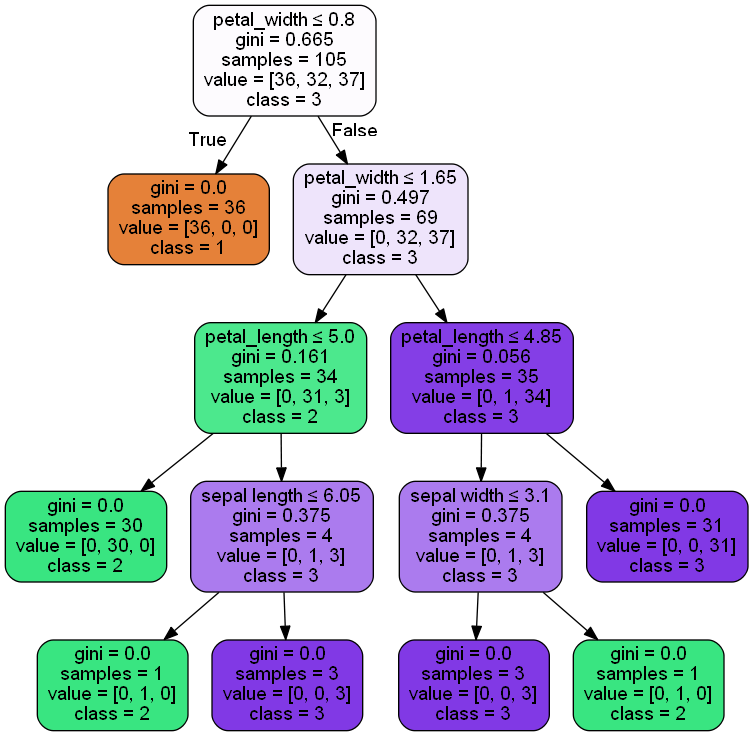

In [117]:

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=None)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred=clf.predict(X_test)
    
#Visualizing the tree
    
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())  



In [118]:

y_pred=[]

def decisiontree(max_depth):

    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(max_depth=max_depth)

    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)

    #Predict the response for test dataset
    this_y_pred=clf.predict(X_test)
    y_pred.append(this_y_pred)
    
    print("Accuracy:",metrics.accuracy_score(y_test, this_y_pred))
 
    
depth_vector=[2,3,None]
for max_depth in depth_vector:
    decisiontree(max_depth)
    

Accuracy: 0.9555555555555556
Accuracy: 0.9555555555555556
Accuracy: 0.9555555555555556


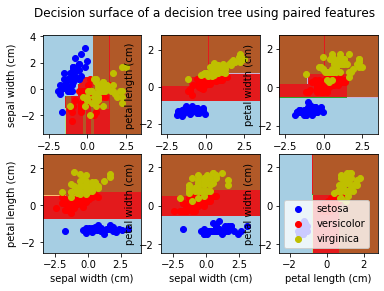

In [119]:
#Visualizing the decision boundaries


import matplotlib.pyplot as plt

from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

In [120]:
#Comparing to a simpler model

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns

k_range=range(1,5)
score_list=[]

for k in k_range: #same result for k=1,...,10
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score_list.append(metrics.accuracy_score(y_test,y_pred))

print(score_list)

[0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777]


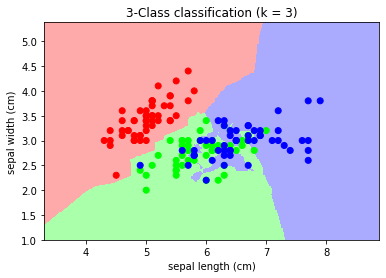

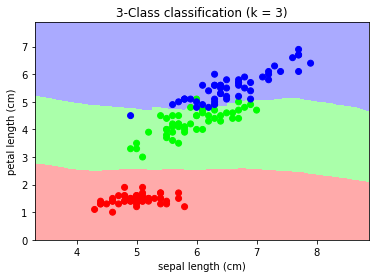

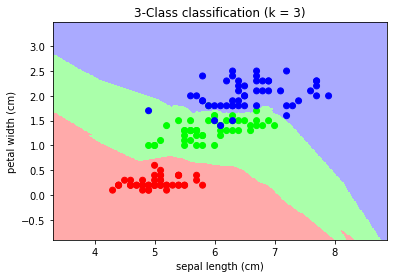

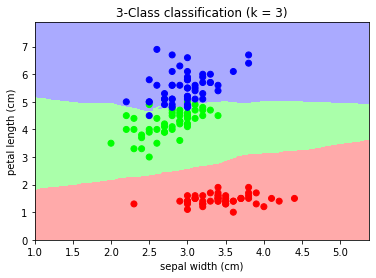

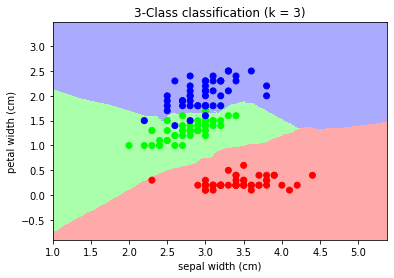

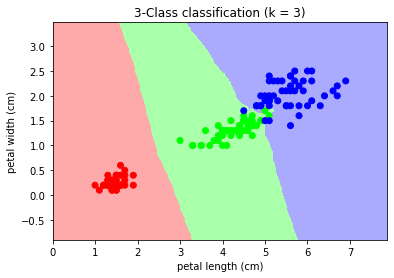

In [121]:
# Visualizing decision boundaries of kNN with k=3

from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 3

h = .02  # step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    
    X = iris.data[:, pair]    # again selecting all pairs of features
    y = iris.target
    
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1   
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)" % (n_neighbors))
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    

plt.show()